In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [8]:
df=pd.read_csv("bank.csv", encoding='utf-8', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
col_list = [] #to add all the object columns into this list

for col in df.columns:
    if(df[col].dtype == "object"):
        col_list.append(col)
print(col_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [13]:
col_list.pop(-1)
label_encoder = LabelEncoder()
for i in col_list:
    df[i] = label_encoder.fit_transform(df[i])

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no


In [16]:
X = df.iloc[:,:-1] #features or Independent variables
y = df.iloc[:,-1] #target data

In [18]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
978,34,2,0,2,0,262,0,0,0,20,9,371,1,-1,0,3
251,32,4,1,2,0,2349,0,0,0,14,1,134,5,-1,0,3
3139,34,9,2,1,0,1076,0,0,0,8,1,70,2,-1,0,3
1822,31,4,1,2,0,156,0,0,0,13,1,657,7,-1,0,3
4445,46,1,1,0,0,258,1,0,2,27,8,217,1,-1,0,3


In [20]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pre=clf.predict(x_test)

In [22]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          no       0.94      0.92      0.93       807
         yes       0.42      0.48      0.45        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.69       905
weighted avg       0.88      0.87      0.88       905



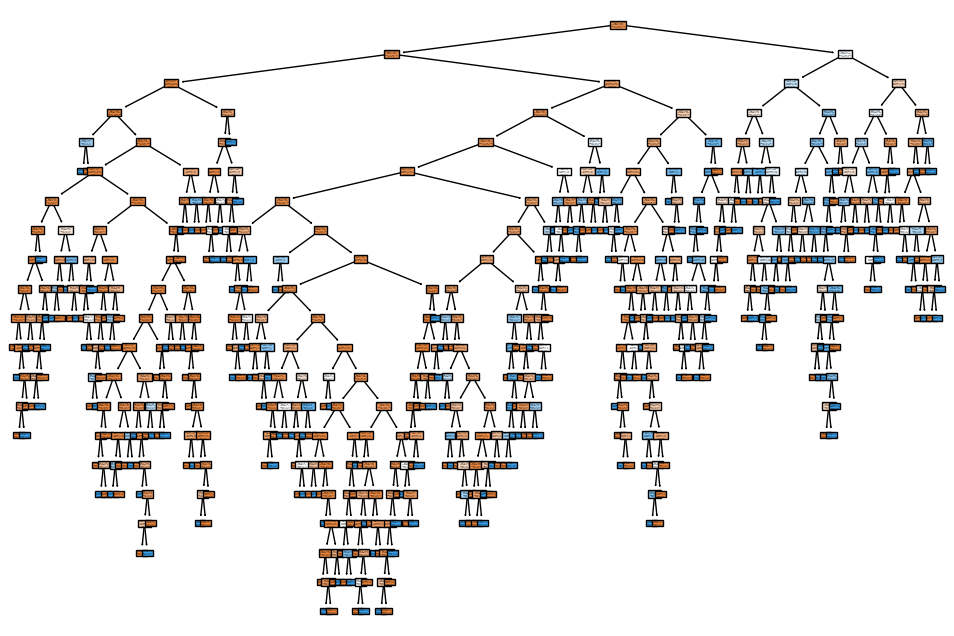

In [24]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=X.columns, class_names=['No','Yes'],filled=True)
plt.show()

In [25]:
importances=clf.feature_importances_
feature_names=X.columns
feature_importance=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
print(feature_importance)

      Feature  Importance
11   duration    0.270307
9         day    0.141445
5     balance    0.115560
0         age    0.099342
13      pdays    0.079896
10      month    0.068469
15   poutcome    0.055787
1         job    0.054381
12   campaign    0.032932
2     marital    0.019905
6     housing    0.019374
8     contact    0.017173
3   education    0.011879
14   previous    0.007587
7        loan    0.003279
4     default    0.002683


In [26]:
param_grid={'max_depth':[None,5,10,15],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4]}
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [27]:
best_params=grid_search.best_params_
clf=DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [28]:
y_pred=clf.predict(x_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94       807
         yes       0.55      0.33      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



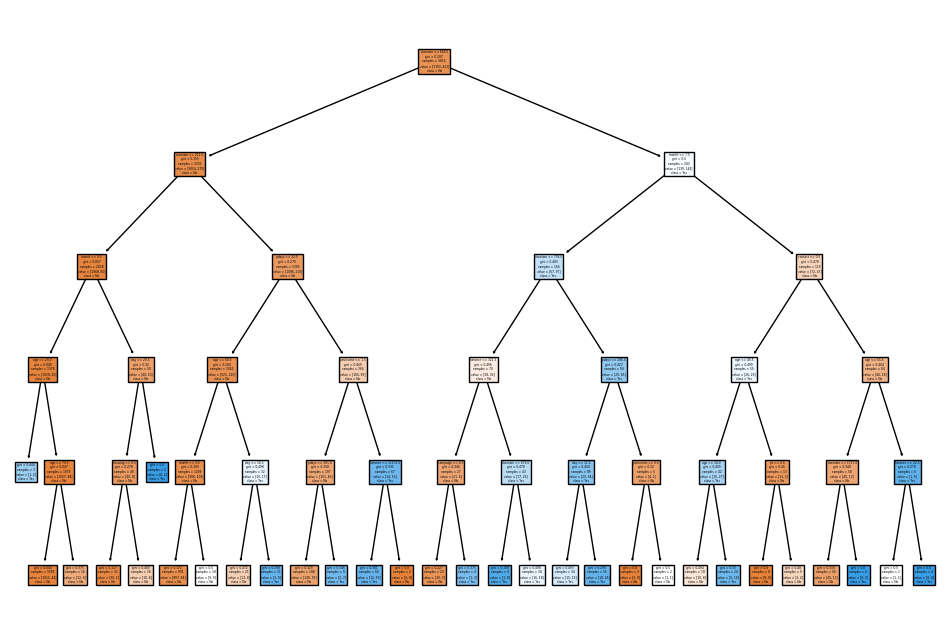

In [31]:
plt.figure(figsize=(12,8))
plt.title("Decision Tree")
tree.plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()